In [8]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [9]:
path = 'ex2data2.txt'
data = pd.read_csv(path,names=['Test1','Test2','Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


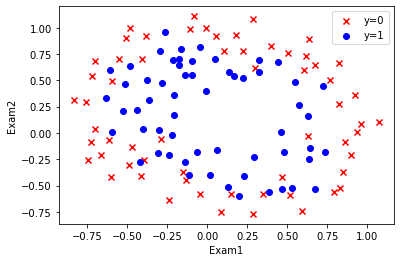

In [10]:
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')
plt.show()

In [11]:
# 特征映射

In [12]:
def feature_mapping(x1,x2,power):
    data = {}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)

In [13]:
x1 = data['Test1']
x2 = data['Test2']

In [14]:
data2 = feature_mapping(x1,x2,6)
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [15]:
X = data2.values
X.shape

(118, 28)

In [16]:
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)
y.shape

(118, 1)

In [17]:
def sigmiod(z):
    return 1/(1+np.exp(-z))

In [18]:
def costFunction(X,y,theta,lamda):
    A = sigmiod(X@theta)
    first = y*np.log(A)
    second = (1-y)*np.log(1-A)
    reg = np.sum(np.power(theta[1:],2))*(lamda/(2*len(X)))
    return -np.sum(first + second)/len(X)+reg

In [19]:
theta = np.zeros((28,1))
theta.shape

(28, 1)

In [20]:
lamda = 1

In [21]:
cost_init = costFunction(X,y,theta,lamda)
cost_init

0.6931471805599454

In [22]:
# 梯度下降函数

In [23]:
def gradientDescent(X,y,theta,alpha,iters,lamda):
    costs = []

    for i in range(iters):

        reg = theta[1:]*int(lamda/len(X))
        reg = np.insert(reg,0,values=0,axis=0)

        theta = theta-(X.T@(sigmiod(X@theta)-y))*alpha/len(X)-reg
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
        if i% 1000 ==0:
            print(cost)
    return theta,costs

In [24]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [25]:
theta_final,costs = gradientDescent(X,y,theta,alpha,iters,lamda)

0.693134380798985
0.6818207285255232
0.6725973013714084
0.6646383221404809
0.6575088694640914
0.6509711449470786
0.6448875416867819
0.63917254885035
0.633768777890895
0.6286348413909699
0.623739075192849
0.6190561680621085
0.6145652605143096
0.6102488035017372
0.6060918236610817
0.6020814165194072
0.5982063753704954
0.5944569065877984
0.5908244039129069
0.5873012654955786
0.5838807434377024
0.5805568189099329
0.577324097855552
0.5741777235156346
0.5711133028282062
0.5681268443390893
0.565214705701808
0.5623735491867022
0.5596003038933238
0.5568921335825465
0.554246409227113
0.5516606855296436
0.5491326807815378
0.5466602595393818
0.5442414176812131
0.5418742694762815
0.5395570363613225
0.5372880371658005
0.5350656795698475
0.5328884526130221
0.5307549201007973
0.5286637147797095
0.5266135331722317
0.5246031309792901
0.5226313189724726
0.5206969593098428
0.518798962219241
0.5169362830013358
0.515107919311749
0.5133129086875281
0.5115503262882626
0.5098192828263828
0.50811892266477
0.506

In [26]:
def predict(X,theta):
    prob = sigmiod(X@theta)
    return [1 if x >=0.5 else 0 for x in prob]

In [27]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre==y)
print(acc)

0.8135593220338984


(40000, 28)
(40000, 1)
(200, 200)


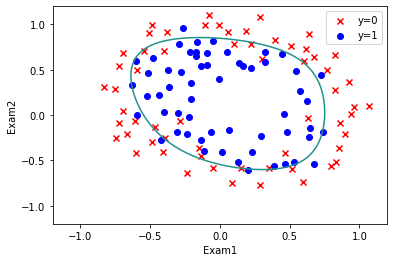

In [34]:
x = np.linspace(-1.2,1.2,200)
xx,yy= np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values
print(z.shape)
zz = z@theta_final
print(zz.shape)
zz = zz.reshape(xx.shape)
print(zz.shape)
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')

plt.contour(xx,yy,zz,0)
plt.show()